# Prosper Loan Listing Data Exploration
## by Roy Amante A. Salvador

## Preliminary Wrangling

This document explores a dataset containing 113,937 loan listing records with 81 variables such as amount of loan, interest rate, status of loan. borrower information among many more. 

In [998]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [999]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [1000]:
# high-level overview of data shape preview
print(df.shape)
# preview data
df.head(5)

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [1001]:
# check data composition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [1002]:
# Verified no duplicates
df[df.duplicated()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


In [1003]:
# No record 
df[df['LoanOriginationDate'].isnull()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


### What is the structure of your dataset?

The dataset contains 81 fields from at least three [Prosper Observational Units](https://www.prosper.com/Downloads/Services/Documentation/ProsperDataExport_Details.html) - Listing, Loan and Credit Profile objects. Every record has a Loan Origination Date so we can assume that every listing were funded and turned into a loan. As there are a lot of fields, we will only pick a few of them for exploration and mention during the Univariate Exploration if there are notable things regarding structure of these fields.

### What is/are the main feature(s) of interest in your dataset?

We are interested on finding out the factors on determining a loan's interest rate at Prosper.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

To help answer out topic of interest, we explore the following features in our dataset:
* Loan Listing Information
    * Interest Rate, Loan Amount, Loan Term, Loan Status, Risk Rating, Category, Period of Origination
    
* Borrower Information
    * Income Range, Credit Score, Group Membership
    
* Funding Information
    * Number of Investors, Speed of Funding

## Univariate Exploration
We start looking at the distribution of our variables.

###  Loan Interest Rate
Our main feature of interest. Most common interest rates falls around 15% and 30%. It's rare to have interest rates below 5% or above 35%.

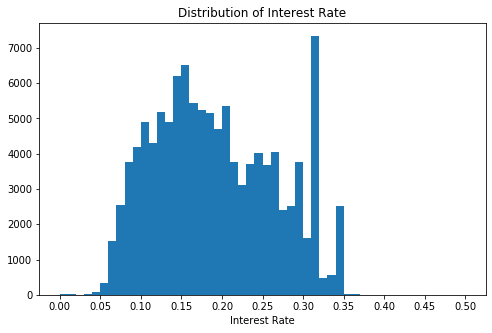

In [1004]:
# plot histogram of interest rate
binsize = 0.01
min_ir = df['BorrowerRate'].min()
max_ir = df['BorrowerRate'].max()
bins = np.arange(0, max_ir+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerRate', bins=bins)
plt.xticks(np.arange(min_ir, max_ir+binsize, 0.05))
plt.xlabel('Interest Rate')
plt.title('Distribution of Interest Rate')
plt.show()



###  Loan Amount

Loan amounts are typically on rounded values as demonstrated by the peaks at 1k, 2k, 4k, 10k, 15k and 20k. Most common loan amount falls around 4k. If we remove the peaks, loan amount has somewhat a long-tailed distribution but becomes closer to a normal distribution when plotted on a log-scale.

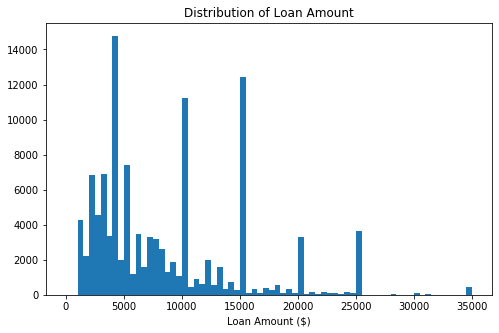

In [1005]:
# plot histogram of loan amount
binsize = 500
bins = np.arange(0, df['LoanOriginalAmount'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'LoanOriginalAmount', bins=bins)
plt.xlabel('Loan Amount ($)')
plt.title('Distribution of Loan Amount')
plt.show()

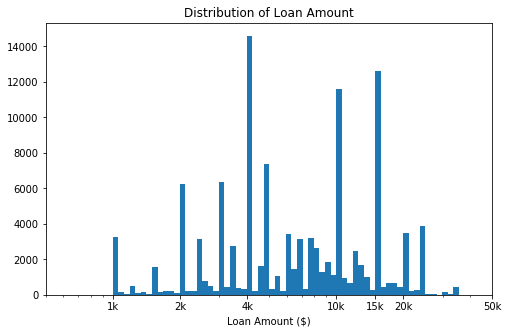

In [1006]:
# there's somewhat a long tail distribution when peaks are removed, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=df, x = 'LoanOriginalAmount', bins=bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 4e3, 1e4, 1.5e4, 2e4, 5e4], ['1k', '2k', '4k', '10k', '15k', '20k', '50k'])
plt.xlabel('Loan Amount ($)')
plt.xlim(500)
plt.title('Distribution of Loan Amount')
plt.show()

###  Loan Term
There are only three types of terms - 12, 36 and 60 months. Majority of the loans are on 36 months term while it is least likely to be given 12 months term. 

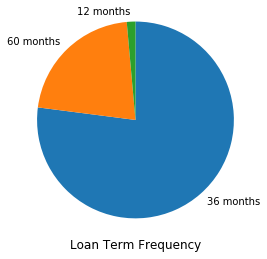

In [1007]:
# Create ordinal categorical variable for loan term
df['TermDesc'] = df['Term'].astype(str) + ' months'
ordinal_loan_term = pd.api.types.CategoricalDtype(ordered = True, categories = ['12 months', '36 months', '60 months'])
df['TermDesc'] = df['TermDesc'].astype(ordinal_loan_term)

# create pie chart of loan term
sorted_counts = df['TermDesc'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square')
plt.title('Loan Term Frequency', y=-0.12)
plt.show()

### Loan Risk Rating
For the risk rating, we use the Borrower's Credit Grade for listings before 2009 and Prosper Rating for 2009 onwards. Both bar charts below show middle risk ratings are most common.

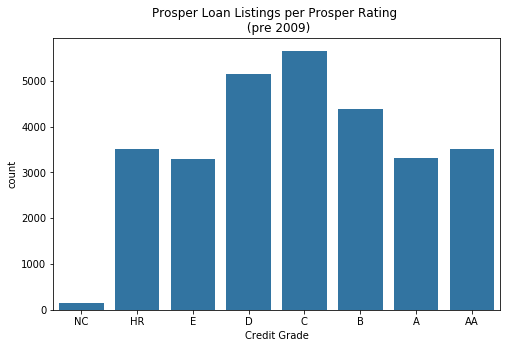

In [1008]:
# Make Credit Grade ordinal
credit_grades = ['NC', 'HR', 'E', 'D',  'C', 'B', 'A', 'AA']
ordinal_credit_grades = pd.api.types.CategoricalDtype(ordered = True, categories = credit_grades)
df['CreditGrade'] = df['CreditGrade'].astype(ordinal_credit_grades)

# create bar chart for Prosper Ratings
default_color = sb.color_palette()[0]
plt.figure(figsize=[8, 5])
sb.countplot(data = df, x = 'CreditGrade', color = default_color)
plt.title('Prosper Loan Listings per Prosper Rating \n (pre 2009)')
plt.xlabel('Credit Grade')
plt.show()

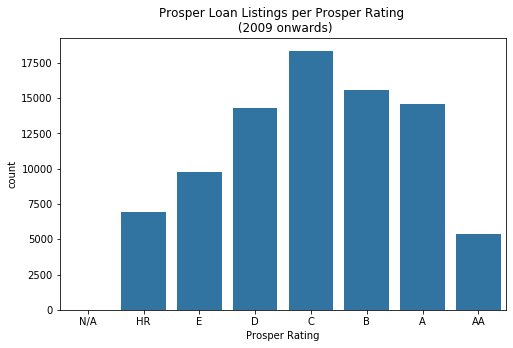

In [1009]:
# Make Prosper Ratings ordinal
prosper_ratings = ['N/A', 'HR', 'E', 'D',  'C', 'B', 'A', 'AA']
ordinal_prosper_ratings = pd.api.types.CategoricalDtype(ordered = True, categories = prosper_ratings)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ordinal_prosper_ratings)

# create bar chart for Prosper Ratings
default_color = sb.color_palette()[0]
plt.figure(figsize=[8, 5])
sb.countplot(data = df, x = 'ProsperRating (Alpha)', color = default_color)
plt.title('Prosper Loan Listings per Prosper Rating \n (2009 onwards)')
plt.xlabel('Prosper Rating')
plt.show()

###  Loan Status
All listings with *Past Due* are consolidated into one category. Most Prosper loans are of healthy status (Current, Final Payment In Progress or Completed).

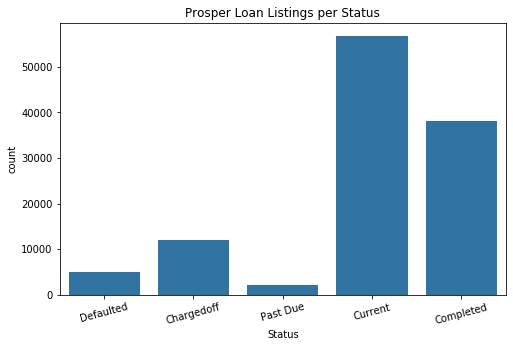

Current       56781
Completed     38074
Chargedoff    11992
Defaulted      5018
Past Due       2067
Name: LoanStatusSimplified, dtype: int64

In [1010]:
# create ordinal categorical variable for Loan Status
# simplify by grouping all past dues together
def group_past_due(status) :
    if 'Past Due' in status :
        return 'Past Due'
    elif 'FinalPayment' in status :
        return 'Current'
    else :
        return status

loan_status = ['Defaulted', 'Chargedoff', 'Past Due', 'Current', 'Completed']    
df['LoanStatusSimplified'] = df['LoanStatus'].apply(group_past_due)
ordinal_loan_status = pd.api.types.CategoricalDtype(ordered = True, categories = loan_status)
df['LoanStatusSimplified'] = df['LoanStatusSimplified'].astype(ordinal_loan_status)

# Create Bar chart
default_color = sb.color_palette()[0]
plt.figure(figsize=[8, 5])
sb.countplot(data = df, x = 'LoanStatusSimplified', color = default_color)
plt.title('Prosper Loan Listings per Status')
plt.xlabel('Status')
plt.xticks(rotation=15)
plt.show()

df['LoanStatusSimplified'].value_counts()

###  Loan Category
Majority of the listings are loans for debt consolidation. Many of them have no available category. A number of the listings are for business, home improvement or for some other miscellaneous purpose.

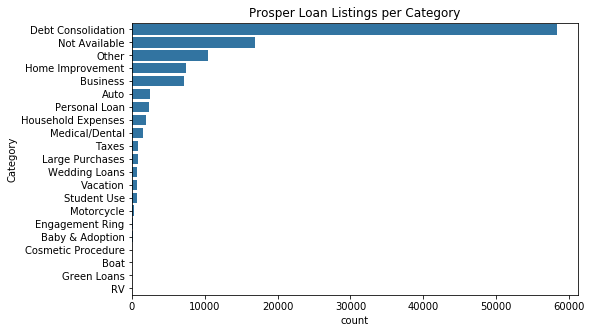

In [1011]:
# create category column with appropriate labels
categories = ['Not Available', 'Debt Consolidation', 'Home Improvement', 
              'Business', 'Personal Loan', 'Student Use', 
              'Auto', 'Other', 'Baby & Adoption', 'Boat', 
              'Cosmetic Procedure', 'Engagement Ring', 
              'Green Loans', 'Household Expenses', 'Large Purchases', 
              'Medical/Dental', 'Motorcycle', 'RV', 
              'Taxes', 'Vacation', 'Wedding Loans']
def to_category_label(category_id) :
    return categories[category_id]

df['ListingCategoryDesc'] = df['ListingCategory (numeric)'].apply(to_category_label)

# create bar chart for loan category
default_color = sb.color_palette()[0]
category_counts = df['ListingCategoryDesc'].value_counts()
plt.figure(figsize=[8, 5])
sb.countplot(data = df, y = 'ListingCategoryDesc', order=category_counts.index, color = default_color)
plt.title('Prosper Loan Listings per Category')
plt.ylabel('Category')
plt.show()

###  Loan Origination Period
We extract the Loan Origination Year from the LoanOriginationQuarter field. Overall the trend is that the number of Prosper loan listings has increased from 2005 to 2014 so we can say Prosper has grown in popularity. There's a notable dip in 2009 which might be due to the 2008 Global financial crisis but it steadily went up until 2013. We have lower count for 2014 since data was cutoff on that year.

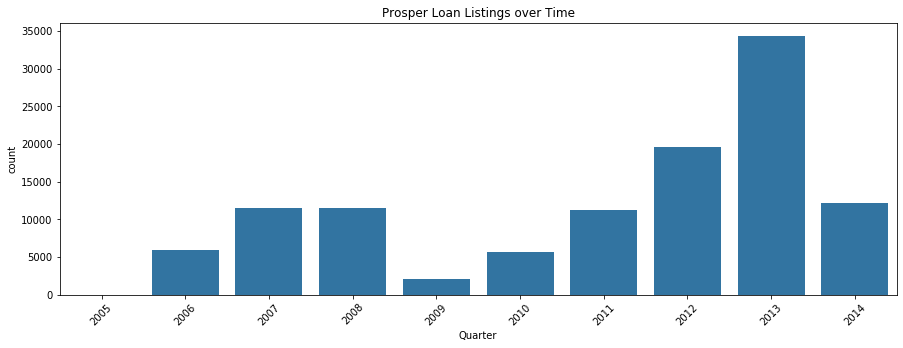

In [1012]:
# Extract and convert the Loan Origination Quarter to 
def to_loan_orig_quarter_label(label, period='year') :
    tokens = label.split(' ')
    year = tokens[1]
    quarter = tokens[0]
    
    if period == 'quarter' :        
        return year + ' ' + quarter
    else :
        return year

# Set in alphabetical order    
df['LoanOriginationYear'] = df['LoanOriginationQuarter'].apply(to_loan_orig_quarter_label)
cat_values = sorted(list(df['LoanOriginationYear'].unique()))
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = cat_values)
df['LoanOriginationYear'] = df['LoanOriginationYear'].astype(ordered_var)

# create bar chart 
plt.figure(figsize=[15, 5])
sb.countplot(data = df, x = 'LoanOriginationYear', color = default_color)
plt.xticks(rotation=45)
plt.title('Prosper Loan Listings over Time')
plt.xlabel('Quarter')
plt.show()


### Borrower's Income
We choose the *IncomeRange* as it contains both the income and employment status information. Per the bar chart below. it's rare for a borrower with originated loan listing to be unemployed or have no income. Majority of the borrower's income fall around 25,000 - 74,999 dollars.

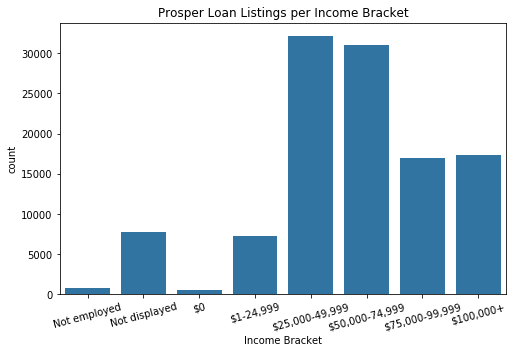

In [1013]:
# Create ordinal categorical type of Borrower's Income
income_brackets = ['Not employed', 'Not displayed', '$0', '$1-24,999', 
                   '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
ordinal_income_bracket = pd.api.types.CategoricalDtype(ordered = True, categories = income_brackets)
df['IncomeRange'] = df['IncomeRange'].astype(ordinal_income_bracket)

# Create bar chart
plt.figure(figsize=[8, 5])
sb.countplot(data = df, x = 'IncomeRange', color = default_color)
plt.xticks(rotation=15)
plt.title('Prosper Loan Listings per Income Bracket')
plt.xlabel('Income Bracket')
plt.show()

### Borrower's Credit Score
We use the [FICO Ranges](https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-is-a-good-credit-score/) to categorize the credit scores. Borrower's tend to have good credit scores.

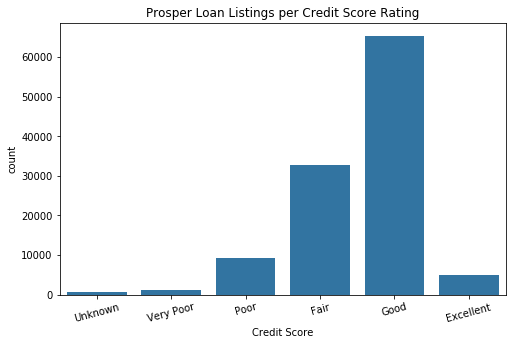

In [1014]:
# create ordinal categorical variable of credit score
credit_range = ['Unknown', 'Very Poor', 'Poor', 'Fair', 'Good', 'Excellent']
def to_credit_rating(score) :
    if score > 780 :
        return credit_range[5]
    elif score > 660 :
        return credit_range[4]
    elif score > 600 :
        return credit_range[3]
    elif score > 500 :
        return credit_range[2]
    elif score > 300 :
        return credit_range[1]
    else :
        return credit_range[0]

df['CreditScore'] = df['CreditScoreRangeLower'].apply(to_credit_rating)
ordinal_credit_rating = pd.api.types.CategoricalDtype(ordered = True, categories = credit_range)
df['CreditScore'] = df['CreditScore'].astype(ordinal_credit_rating)

# Create bar chart
plt.figure(figsize=[8, 5])
sb.countplot(data = df, x = 'CreditScore', color = default_color)
plt.xticks(rotation=15)
plt.title('Prosper Loan Listings per Credit Score Rating')
plt.xlabel('Credit Score')
plt.show()


### Borrower's Group Membership
Majority of the borrower's have no group membership at the time they listed the loan.

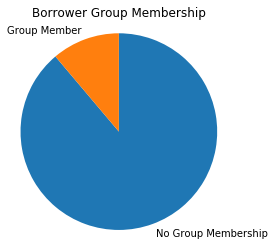

In [1015]:
# Create categorical column for Borrower's Group Membership
def to_groupmember_label(is_groupmember) :
    if is_groupmember :
        return 'Group Member'
    else :
        return 'No Group Membership'

df['GroupMembership'] = df['CurrentlyInGroup'].apply(to_groupmember_label)

# Create pie chart of  Group Membership
sorted_counts = df['GroupMembership'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square')
plt.title('Borrower Group Membership')
plt.show()

### Number of Investors
Number of investors per listing has a long tail distribution. Upon zooming in, we see that typically a listing has only one  investor.

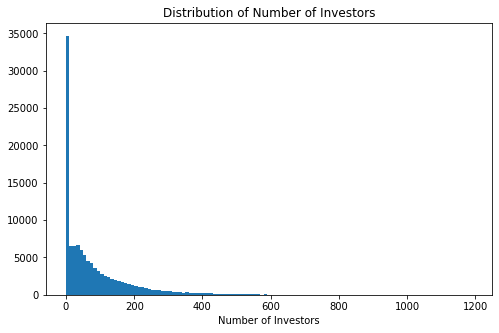

In [1016]:
# plot number of investors distribution
binsize = 10
bins = np.arange(0, df['Investors'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Investors', bins=bins)
#plt.xticks(np.arange(0, max_ir+binsize, 10))
plt.xlabel('Number of Investors')
plt.title('Distribution of Number of Investors')
plt.show()

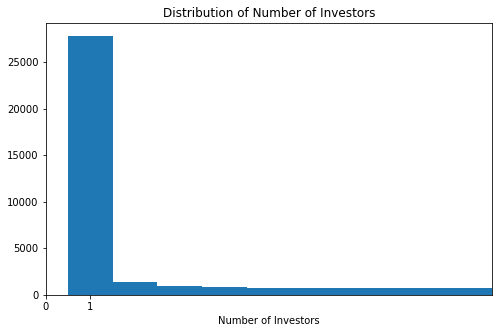

In [1017]:
# zoom in to the first bin in previous chart
binsize = 1
bins = np.arange(0.5, df['Investors'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Investors', bins=bins)
plt.xticks(np.arange(0, max_ir+binsize, 1))
plt.xlabel('Number of Investors')
plt.title('Distribution of Number of Investors')
plt.xlim(0,10)
plt.show()

### Speed of Funding 
We create a derived field for speed of funding. It also has a long tail distribution. We zoomed in from 0 to 35 days. Commonly loans are originated 3 days up to 1 week from their listing dates.

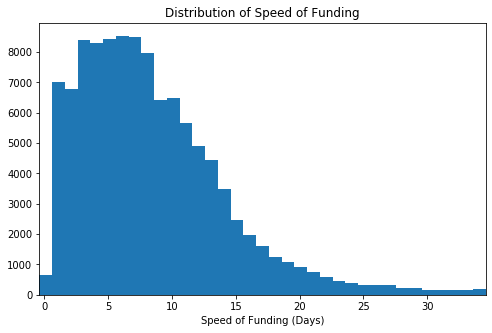

In [1018]:
# Create funding speed day in units which is the
# number of days elapsed from listing is created and when the loan originated
df['FundingSpeedDays']  = ( pd.to_datetime(df['LoanOriginationDate']) - pd.to_datetime(df['ListingCreationDate']) ) \
    / pd.to_timedelta(1, unit='D')

binsize = 1
min_fsd = df['FundingSpeedDays'].min()
max_fsd = df['FundingSpeedDays'].max()
bins = np.arange(0, max_fsd + binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'FundingSpeedDays', bins=bins)
plt.xticks(np.arange(min_fsd, max_fsd + binsize, 5))
plt.xlim(0, 35)
plt.xlabel('Speed of Funding (Days)')
plt.title('Distribution of Speed of Funding')
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Notes about the distributions of our variables are already mentioned above. There are outlier points for *Number of Investors* and *Speed of Funding* so resulting visualization was zoomed in to the main part of the distribution. 

The loan amount has a large range of values so log transform is used. Under the transformation, it looks more of a normal distribution if we remove the peaks (which are rounded amounts).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Many features were tidied up and/or made as ordinal categorical variables. These are Loan Term, Loan Status, Risk Rating, Borrower's Credit Score and Borrower's Income. This is for anticipation of plotting them together during bivariate and multivariate analysis. It will be more convenient for them to use on visualizations with more than one variable.

## Bivariate Exploration

We first check the correlation of our numerical variables that are of interest. 

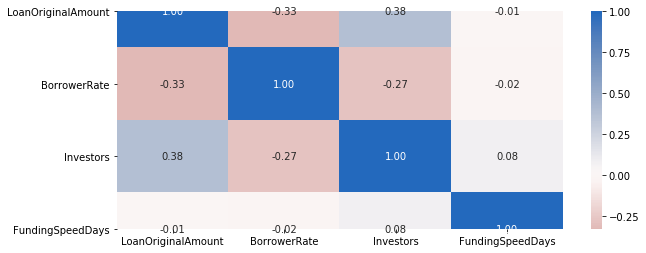

In [1019]:
# correlation plot
numeric_vars = ['LoanOriginalAmount', 'BorrowerRate', 'Investors', 'FundingSpeedDays']
plt.figure(figsize = [10, 4])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.show()

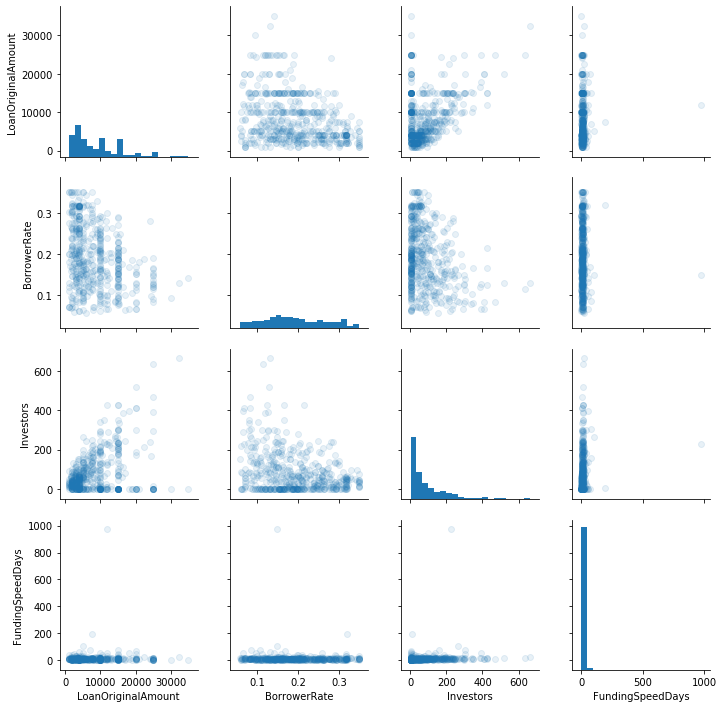

In [1020]:
# plot matrix: sample 500 samples so that plots are clearer and
# they render faster
samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter, alpha=1/10);

Checking the heatmap and scatterplots above, we can see
* Loan Amount is moderately correlated with Loan Interest Rate and  Number of Investors
* Loan Interest rate has some correlation with Number of Investors

Now let's try to pair up our categorical variables with our numerical variables.

In [1021]:
# plot matrix of numeric features against categorical features.
numeric_vars = [ 'BorrowerRate', 'LoanOriginalAmount', 'Investors', 'FundingSpeedDays']
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

<Figure size 720x720 with 0 Axes>

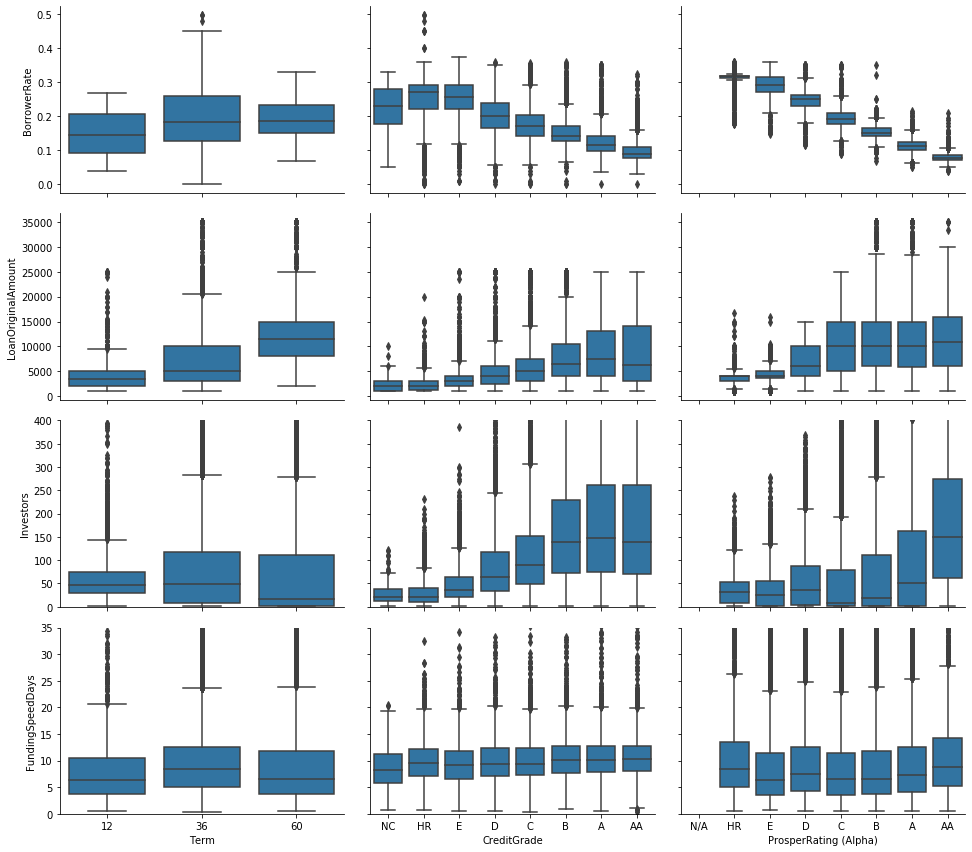

In [1022]:
# Plot Loan Term, Loan Risk Rating vs numerical features 

categoric_vars = ['Term', 'CreditGrade', 'ProsperRating (Alpha)']
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df, y_vars = numeric_vars, x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid);
g.axes[2,0].set_ylim(0,400)
g.axes[3,0].set_ylim(0,35)
plt.show();

From the boxplots, we can see:
* Loan Amount increases as the number of months in the term increases. 
* The amount that can be loaned tends to be lower for ratings with higher risk. 
* Interest Rates are generally lower when the loan risk rating is better.
* We tend to have more investors when the loan risk rating is better.

We further examine Loan Term's effect on Interest Rate by creating a violinplot. The distribution made it more clear that
* Higher interest rates tend to be associated with loan term with higher number of months.

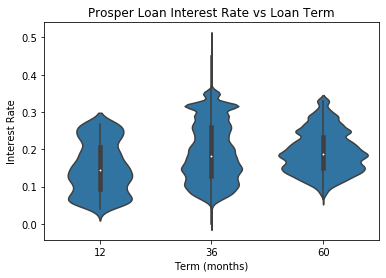

In [1023]:
# Create violinplot of Loan Term
sb.violinplot(data=df, y = 'BorrowerRate', x = 'Term', color = default_color)
plt.title('Prosper Loan Interest Rate vs Loan Term')
plt.xlabel('Term (months)')
plt.ylabel('Interest Rate')
plt.show()

<Figure size 720x720 with 0 Axes>

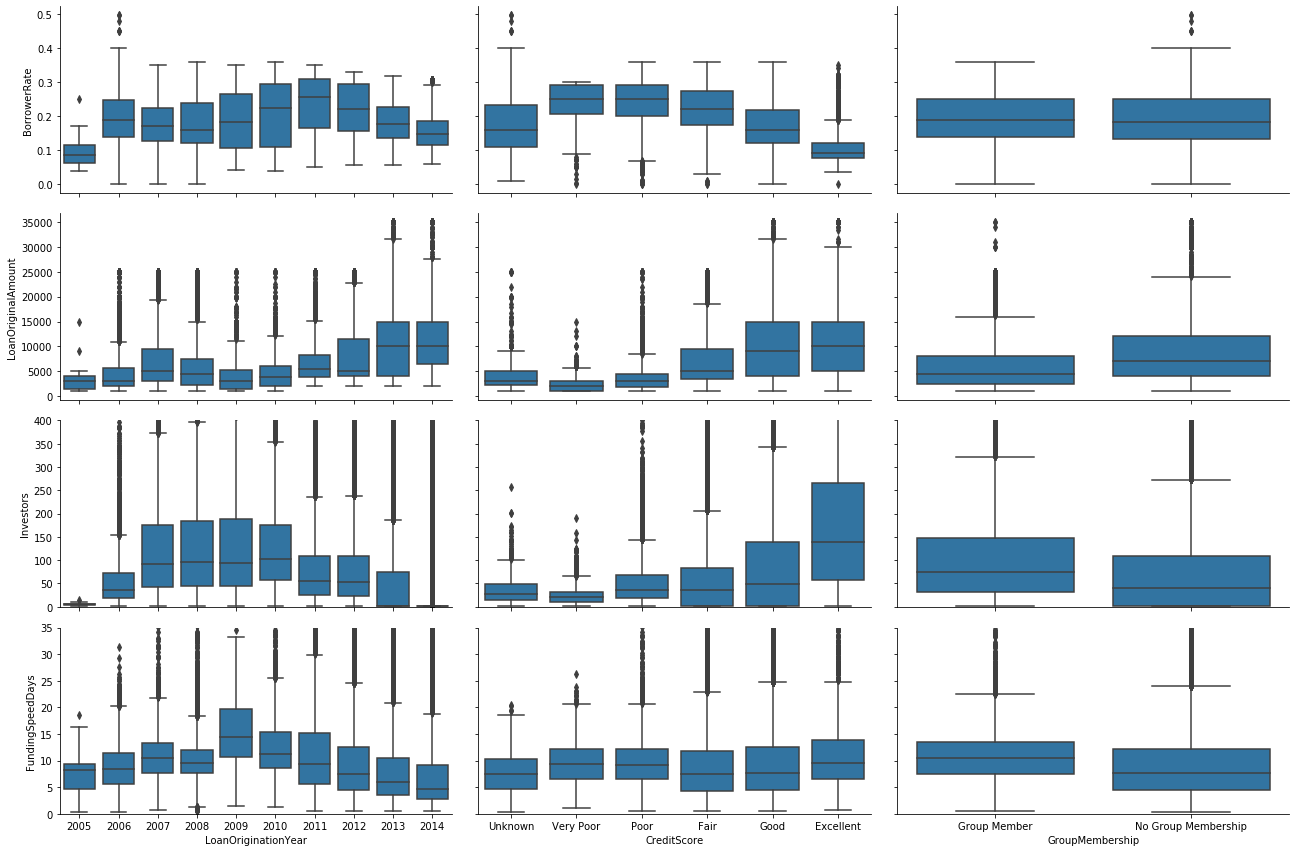

In [1024]:
# Plot Loan OriginationYear, Brower's Credit Score, Borrower's Group Membership vs numerical features 

categoric_vars = ['LoanOriginationYear', 'CreditScore', 'GroupMembership']

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df, y_vars = numeric_vars, x_vars = categoric_vars,
                height = 3,  aspect = 2)
g.map(boxgrid)
g.axes[2,0].set_ylim(0,400)
g.axes[3,0].set_ylim(0,35)
plt.show();

* Except during the global financial crisis 2008 - 2009, loan amounts are getting higher over the years
* After 2009, loan listings are funded quicker
* Higher loan amounts and lower interest rates are expected when borrower has better credit rating
* The number of investors seems to go up when the borrower is a member of a group and if his/her credit rating is better.
* The loan amount seems lower when the borrower is a member of a group. 
* Surprisingly, borrowers with group membership tend to be funded slower with no noticeable improvement on interest rates

<Figure size 720x720 with 0 Axes>

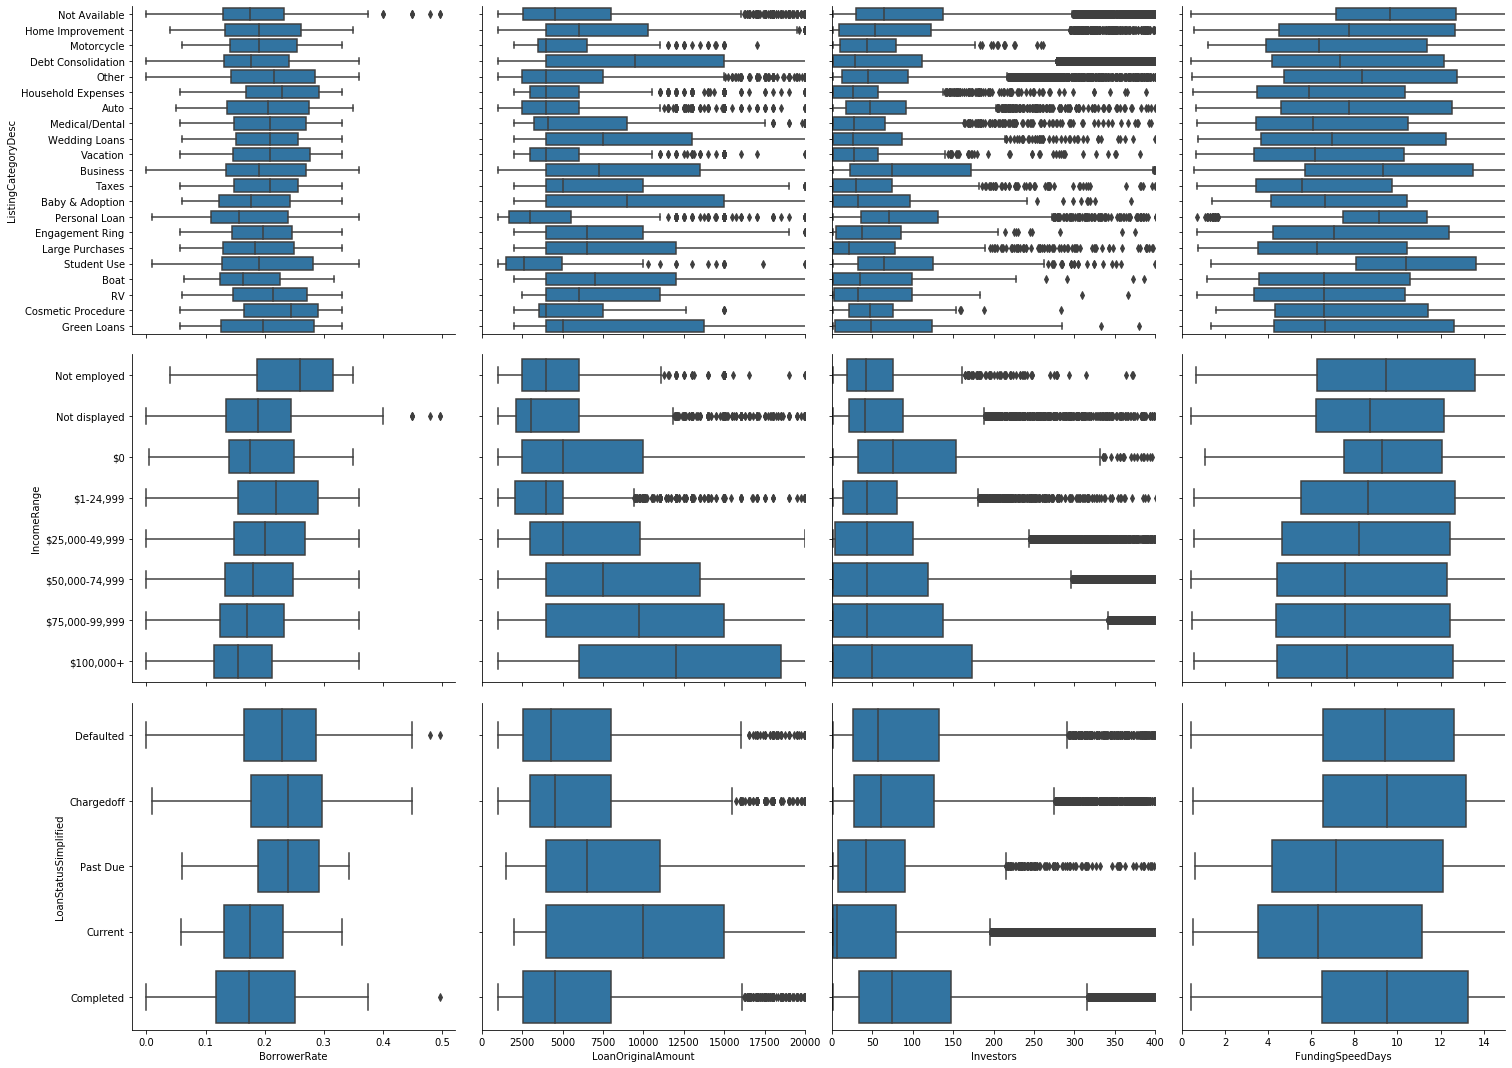

In [1025]:
# Plot Category, Brower's Income Range, Loan Status vs numerical features 

categoric_vars = ['ListingCategoryDesc', 'IncomeRange', 'LoanStatusSimplified']

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df, x_vars = numeric_vars, y_vars = categoric_vars,
                height = 5,  aspect = 1)
g.map(boxgrid);
g.axes[0,1].set_xlim(0,20000)
g.axes[0,2].set_xlim(0,400)
g.axes[0,3].set_xlim(0,15)
plt.show();

* Individuals with higher income tend to have more investors and are able to be funded faster. 
* There are some loan categories have higher interest rates than others such as Cosmetic Procedure.
* There are certain loan categories which need a lower amount than others such as Personal and Student Use. 
* Higher interest rates are seen in loans with delinquent statuses

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
By creating scatterplots, boxplots and violin plot, we're able to see our main feature, Interest Rate, is correlated with most of our other variables. At this point, we have not seen clear relationship of Funding speed and Group Membership with Interest Rate.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Loan amount seems to also be highly correlated with most of our other variables like Loan Risk Rating, Income Range and Credit Score. Funding speed is faster for borrowers who are not members of a group. This seems counter intuitive since we also see there are more investors for members of a group. We would think the number of investors would hasten origination but this is not the case.
   

## Multivariate Exploration
We try to perform multivariate analysis by combining our four numerical variables first by using colored scatterplots. We can see below in the Interest Rate vs Loan amount plot that the number of investors increases both with lower interest rates and higher loan amounts.

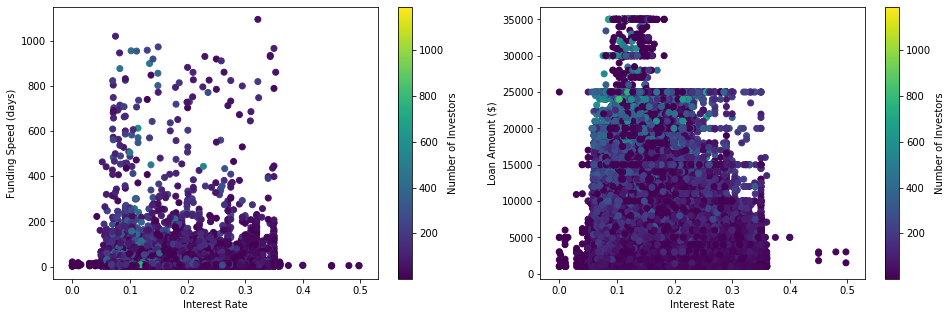

In [1026]:
# Plot Interest Rate, Funding Speed and Investors together
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = [16,5]);
s0 = ax[0].scatter(data=df, x = 'BorrowerRate', y='FundingSpeedDays', c='Investors')
ax[0].set_xlabel('Interest Rate')
ax[0].set_ylabel('Funding Speed (days)')
fig.colorbar(s0, ax=ax[0]).set_label('Number of Investors')

# Plot Interest Rate, Loan Amount and Investors together
s1 = ax[1].scatter(data=df, x = 'BorrowerRate', y='LoanOriginalAmount', c='Investors')
ax[1].set_xlabel('Interest Rate')
ax[1].set_ylabel('Loan Amount ($)')
fig.colorbar(s1, ax=ax[1]).set_label('Number of Investors')


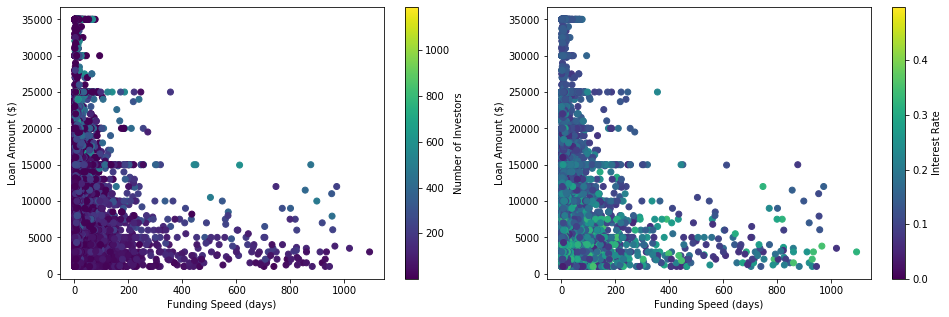

In [1027]:
# Plot Interest Rate, Loan Amount and funding Speed together
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = [16,5]);
s0 = ax[0].scatter(data=df, x = 'FundingSpeedDays', y='LoanOriginalAmount', c='Investors')
ax[0].set_xlabel('Funding Speed (days)')
ax[0].set_ylabel('Loan Amount ($)')
fig.colorbar(s0, ax=ax[0]).set_label('Number of Investors')

# Plot Interest Rate, Loan Amount and funding Speed together
s1 = ax[1].scatter(data=df, x = 'FundingSpeedDays', y='LoanOriginalAmount', c = 'BorrowerRate')
ax[1].set_xlabel('Funding Speed (days)')
ax[1].set_ylabel('Loan Amount ($)')
fig.colorbar(s1, ax=ax[1]).set_label('Interest Rate')


Still we have no significant interaction between Funding Speed and Interest Rates in these plots. 

Instead of exponentially generating multivariate plots for our categorical variables, we focus on exploring relevance of Funding speed and Group Membership. We manually attempt to match these with some other variable and only included here the best looking ones.

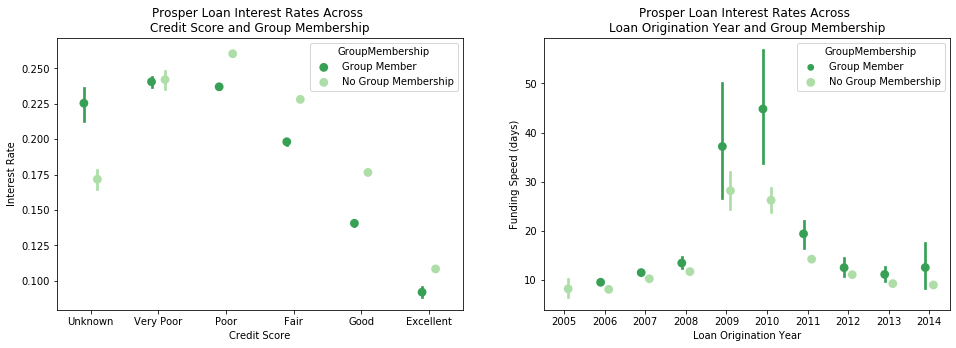

In [1028]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = [16,5]);

# Plot Interest Rate by Credit Score and Credit Score
sb.pointplot(data = df, x = 'CreditScore', y='BorrowerRate', 
             hue = 'GroupMembership', linestyles = '',
             palette = 'Greens_r', dodge=0.2, ax=ax[0])
ax[0].set_xlabel('Credit Score')
ax[0].set_ylabel('Interest Rate')
ax[0].set_title('Prosper Loan Interest Rates Across \nCredit Score and Group Membership')

# Plot Funding Speed by Loan Origination Year and Group Membership
sb.pointplot(data = df, x = 'LoanOriginationYear', y='FundingSpeedDays', 
             hue = 'GroupMembership', linestyles = '',
             palette = 'Greens_r', dodge=0.2, ax=ax[1])
ax[1].set_xlabel('Loan Origination Year')
ax[1].set_ylabel('Funding Speed (days)')
ax[1].set_title('Prosper Loan Interest Rates Across \nLoan Origination Year and Group Membership')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Incorporating Credit Score with Group Membership made it clear that lower interest rates are given to group members. We haven't seen the relationship of the two earlier.

### Were there any interesting or surprising interactions between features?
Interesting that we haven't found some relationship with Funding Speed and Interest Rate instead Funding speed is seen to have more correlation with Group Membership. 